# Introducción a COBRApy
## Análisis de Redes Metabólicas con Python

COBRApy (COnstraint-Based Reconstruction and Analysis) es una biblioteca de Python para el análisis de modelos metabólicos genómicos. Esta herramienta permite realizar análisis de balance de flujos (FBA), análisis de variabilidad de flujos (FVA), y muchos otros tipos de análisis de redes metabólicas.

## 1. Importar Cobra

In [ ]:
import cobra

## 2. Carga de Modelos Metabólicos

COBRApy viene con algunos modelos de ejemplo incluidos, como por ejemplo "e_coli_core". También se pueden cargar modelos desde archivos `.xml`, `.mat` y `.json`.

In [ ]:
# Cargar un modelo de ejemplo - E. coli
model = cobra.io.load_model("e_coli_core");

print(f"Modelo cargado: {model.id}")
print(f"Número de reacciones: {len(model.reactions)}")
print(f"Número de metabolitos: {len(model.metabolites)}")
print(f"Número de genes: {len(model.genes)}")

# Objetivo actual del modelo
print(f"Función objetivo: {model.objective}")
print(f"Dirección de optimización: {model.objective.direction}")

Modelo cargado: e_coli_core
Número de reacciones: 95
Número de metabolitos: 72
Número de genes: 137
Función objetivo: Maximize
1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5
Dirección de optimización: max


## 3. Exploración del Modelo

Vamos a explorar los componentes básicos del modelo: reacciones, metabolitos, genes y medio de cultivo.

In [ ]:
# Veamos el contenido del modelo
model

Name,e_coli_core
Memory address,1e190dad4c0
Number of metabolites,72
Number of reactions,95
Number of genes,137
Number of groups,0
Objective expression,1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5
Compartments,"extracellular space, cytosol"


In [ ]:
# Resumen del modelo
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,4.765,0,0.00%
o2_e,EX_o2_e,21.8,0,0.00%
pi_e,EX_pi_e,3.215,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-22.81,1,100.00%
h2o_e,EX_h2o_e,-29.18,0,0.00%
h_e,EX_h_e,-17.53,0,0.00%


#### Reacciones

In [ ]:
# Explorar las reacciones del modelo
reaction_example = model.reactions[10]  # Se puede elegir por índice
print(f"ID: {reaction_example.id}")
print(f"Nombre: {reaction_example.name}")
print(f"Ecuación: {reaction_example.reaction}")
print(f"Límites: [{reaction_example.lower_bound}, {reaction_example.upper_bound}]")
print(f"Reversible: {reaction_example.reversibility}")


ID: ACALDt
Nombre: Acetaldehyde reversible transport
Ecuación: acald_e <=> acald_c
Límites: [-1000.0, 1000.0]
Reversible: True


In [ ]:
# Buscar una reacción específica
biomass_reaction = model.reactions.get_by_id("BIOMASS_Ecoli_core_w_GAM")
print(f"ID: {biomass_reaction.id}")
print(f"Nombre: {biomass_reaction.name}")
print(f"Reacción de biomasa: {biomass_reaction.reaction}")
print(f"Límites: [{biomass_reaction.lower_bound}, {biomass_reaction.upper_bound}]")

ID: BIOMASS_Ecoli_core_w_GAM
Nombre: Biomass Objective Function with GAM
Reacción de biomasa: 1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
Límites: [0.0, 1000.0]


In [ ]:
# Explorar exchanges (reacciones de intercambio con el medio)
exchange_reactions = model.exchanges
print(f"Número de reacciones de intercambio: {len(exchange_reactions)}")
print("Primeras 5 reacciones de intercambio:")
for exchange in exchange_reactions[:5]:
    print(f"ID: {exchange.id}, Nombre: {exchange.name}, Reacción: {exchange.reaction}")

Número de reacciones de intercambio: 20
Primeras 5 reacciones de intercambio:
ID: EX_ac_e, Nombre: Acetate exchange, Reacción: ac_e --> 
ID: EX_acald_e, Nombre: Acetaldehyde exchange, Reacción: acald_e --> 
ID: EX_akg_e, Nombre: 2-Oxoglutarate exchange, Reacción: akg_e --> 
ID: EX_co2_e, Nombre: CO2 exchange, Reacción: co2_e <=> 
ID: EX_etoh_e, Nombre: Ethanol exchange, Reacción: etoh_e --> 


#### Metabolitos

In [ ]:
# Explorar los metabolitos del modelo

metabolite_example = model.metabolites[10]  # Se puede elegir por índice
print(f"ID: {metabolite_example.id}")
print(f"Nombre: {metabolite_example.name}")
print(f"Fórmula: {metabolite_example.formula}")
print(f"Compartimento: {metabolite_example.compartment}")
print(f"Carga: {metabolite_example.charge}")

ID: icit_c
Nombre: Isocitrate
Fórmula: C6H5O7
Compartimento: c
Carga: -3


In [ ]:
# Buscar un metabolito específico
glucose = model.metabolites.get_by_id("glc__D_e") # Se puede elegir por ID
print(f"Glucosa: {glucose.name}")
print(f"Fórmula: {glucose.formula}")
print(f"Reacciones que involucran glucosa:")
for reaction in glucose.reactions:
    print(f"  - {reaction.id}: {reaction.reaction}")

Glucosa: D-Glucose
Fórmula: C6H12O6
Reacciones que involucran glucosa:
  - EX_glc__D_e: glc__D_e <=> 
  - GLCpts: glc__D_e + pep_c --> g6p_c + pyr_c


#### Compartimentos
Notar que 'e' corresponde a extracelular y 'c' citosol.

In [ ]:
# Explorar compartimentos
compartments = set(met.compartment for met in model.metabolites)
print(f"Compartimentos en el modelo: {compartments}")

Compartimentos en el modelo: {'e', 'c'}


#### Medio de cultivo
Identifica aquellos *exchanges* que pueden tener flujo distinto de cero:

In [ ]:
# Medio de cultivo
model.medium

{'EX_co2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0}

## 4. Análisis de Balance de Flujos (FBA)

El Análisis de Balance de Flujos (Flux Balance Analysis - FBA) es una técnica matemática para analizar el flujo de metabolitos a través de una red metabólica. FBA utiliza programación lineal para encontrar la distribución de flujos que optimiza una función objetivo (generalmente el crecimiento de biomasa).

Para hacerlo, se utiliza el método `optimize()` del objeto model:

In [ ]:
# Realizar la optimización FBA
solution = model.optimize()
print(f"Estado de la optimización: {solution.status}")
print(f"Valor objetivo (tasa de crecimiento): {solution.objective_value:.4f} h⁻¹")


Estado de la optimización: optimal
Valor objetivo (tasa de crecimiento): 0.8739 h⁻¹


La variable `solution` contiene información relevante sobre el resultado de la optimización: el valor de la función objetivo, los flujos calculados para cada reacción y los costos reducidos asociados a cada variable. Esto permite analizar en detalle el comportamiento de cada reacción dentro del modelo metabólico.

In [ ]:
solution

,fluxes,reduced_costs
PFK,7.477382,-1.301043e-17
PFL,0.000000,-1.527746e-02
PGI,4.860861,0.000000e+00
PGK,-16.023526,-3.469447e-18
PGL,4.959985,0.000000e+00
...,...,...
NADH16,38.534610,0.000000e+00
NADTRHD,0.000000,-2.546243e-03
NH4t,4.765319,0.000000e+00
O2t,21.799493,0.000000e+00


## 5. Manipulación del Modelo

Una de las funcionalidades más poderosas de COBRApy es la capacidad de modificar modelos para simular diferentes condiciones experimentales, como knockouts de genes, cambios en el medio de cultivo, o modificación de límites de flujo.

A continuación, haremos un knock out del gen que codifica a la Malato Deshidrogenasa, lo cual "cortará" el ciclo de Krebs. Por lo tanto, se espera una reducción en la velocidad de crecimiento *E. coli*.

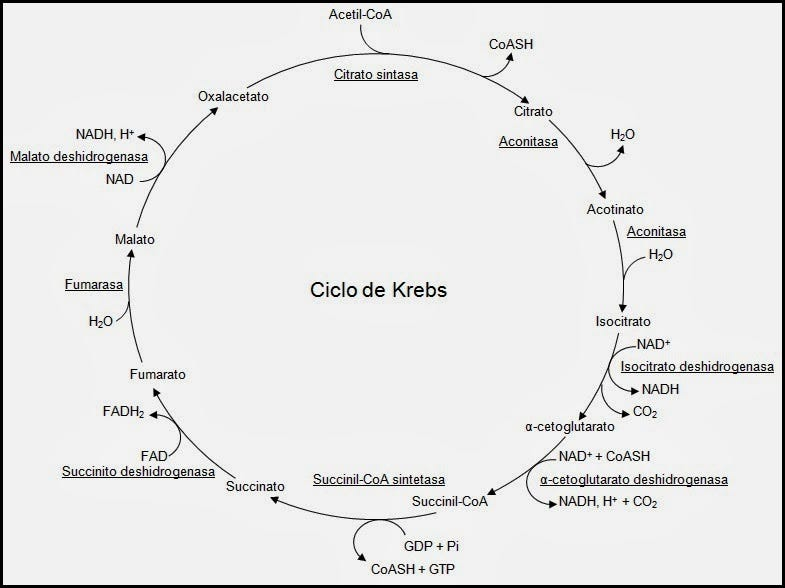

In [ ]:
# Guardar el crecimiento original
original_growth = model.optimize().objective_value
print(f"Crecimiento original: {original_growth:.4f} h⁻¹")

# Buscar la reacción de malato deshidrogenasa
mdh_rxn_id = "MDH"

with model:
    rxn = model.reactions.get_by_id(mdh_rxn_id)
    rxn.knock_out()
    knockout_solution = model.optimize()
    knockout_growth = knockout_solution.objective_value

    print(f"Reacción knockeada: {rxn.id} ({rxn.name})")
    print(f"Crecimiento después del knockout: {knockout_growth:.4f} h⁻¹")
    print(f"Reducción en crecimiento: {((original_growth - knockout_growth) / original_growth * 100):.2f}%")


Crecimiento original: 0.8739 h⁻¹
Reacción knockeada: MDH (Malate dehydrogenase)
Crecimiento después del knockout: 0.8258 h⁻¹
Reducción en crecimiento: 5.50%


También se pueden cambiar las condiciones del cultivo. Por ejemplo, simular cultivo aeróbico y anaeróbico cambiando el límite de consumo de oxígeno:

In [ ]:
# Crecimiento aeróbico (condición actual)
aerobic_growth = model.optimize().objective_value
print(f"Crecimiento aeróbico: {aerobic_growth:.4f} h⁻¹")

# Crecimiento anaeróbico (sin oxígeno)
with model:
    # Eliminar oxígeno del medio
    model.reactions.EX_o2_e.lower_bound = 0  # No puede consumir oxígeno
    anaerobic_solution = model.optimize()
    anaerobic_growth = anaerobic_solution.objective_value

    print(f"Crecimiento anaeróbico: {anaerobic_growth:.4f} h⁻¹")
    print(f"Reducción por falta de oxígeno: {((aerobic_growth - anaerobic_growth) / aerobic_growth * 100):.2f}%")

Crecimiento aeróbico: 0.8739 h⁻¹
Crecimiento anaeróbico: 0.2117 h⁻¹
Reducción por falta de oxígeno: 75.78%


A continuación, se muestra el cambio de velocidad de crecimiento si es que cambia la fuente de carbono disponible en el medio:

In [ ]:
# Fuente original: Glucosa
glucose_growth = model.optimize().objective_value
print(f"Crecimiento con glucosa: {glucose_growth:.4f} h⁻¹")

# Cambiar a acetato como única fuente de carbono
with model:
    # Bloquear consumo de glucosa
    model.reactions.EX_glc__D_e.lower_bound = 0

    model.reactions.EX_ac_e.lower_bound = -10  # Permitir consumo

    acetate_solution = model.optimize()
    acetate_growth = acetate_solution.objective_value

    print(f"Crecimiento con acetato: {acetate_growth:.4f} h⁻¹")
    print(f"Diferencia: {((glucose_growth - acetate_growth) / glucose_growth * 100):.2f}% menos crecimiento")

Crecimiento con glucosa: 0.8739 h⁻¹
Crecimiento con acetato: 0.1733 h⁻¹
Diferencia: 80.17% menos crecimiento


## Más información

- [Documentación oficial de COBRApy](https://cobrapy.readthedocs.io/)